<a href="https://colab.research.google.com/github/Manasa1205/DataScienceProjects/blob/main/EDA_and_Regression_analysis_of_Daily_Demand_Forecasting_Orders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset description

The Daily Demand Forecasting Orders Data Set is obtained from the UCI Machine Learning. The dataset contains 60 rows and 10 columns.

ATTRIBUTES :

Week of the month {1.0,2.0,3.0,4.0,5.0}

Day of the week (Monday to Friday) {2.0,3.0,4.0,5.0,6.0},

Non urgent orders,

Urgent orders,

Fiscal sector orders,

Orders from the traffic controller sector,

Banking orders (1),

Banking orders (2),

Banking orders (3),

Target (Total orders)

There are 60 observations and 10 columns in the dataset. All the values in the dataset are
continuous variables.

In [ ]:
# importing packages
import numpy as np
from sklearn.datasets import load_iris
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Read the dataset
df =pd.read_csv('/content/Daily Demand Forecasting Orders_new.csv')
df.head()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,6.459,48534,19646,16411,20257,210.517


# **EDA**

1. Provide descriptions of your sample and features

In [ ]:
df = df.rename(columns={'Day of the week (Monday to Friday)': 'DayOfWeek'})
day_map = {2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}
df['DayOfWeek'] = df['DayOfWeek'].map(day_map)

print(df.shape)
print(".......")
print(df.info())
print(".......")
print(df.describe())
print(".......")
print(df.drop_duplicates(subset ="DayOfWeek",))
print(".......")
print(df.value_counts("DayOfWeek"))
print(".......")
print(df.DayOfWeek.unique())
print(".......")

(60, 10)
.......
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Week of the month (first week, second, third, fourth or fifth week  60 non-null     int64  
 1   DayOfWeek                                                           60 non-null     object 
 2   Non-urgent order                                                    60 non-null     float64
 3   Urgent order                                                        60 non-null     float64
 4   Fiscal sector orders                                                60 non-null     float64
 5   Orders from the traffic controller sector                           60 non-null     int64  
 6   Banking orders (1)                                                  60 non-null     int64  
 7   Ba

2. Check for missing data

In [ ]:
df.isnull().sum()

Week of the month (first week, second, third, fourth or fifth week    0
DayOfWeek                                                             0
Non-urgent order                                                      0
Urgent order                                                          0
Fiscal sector orders                                                  0
Orders from the traffic controller sector                             0
Banking orders (1)                                                    0
Banking orders (2)                                                    0
Banking orders (3)                                                    0
Target (Total orders)                                                 0
dtype: int64

3. Identify the shape of data

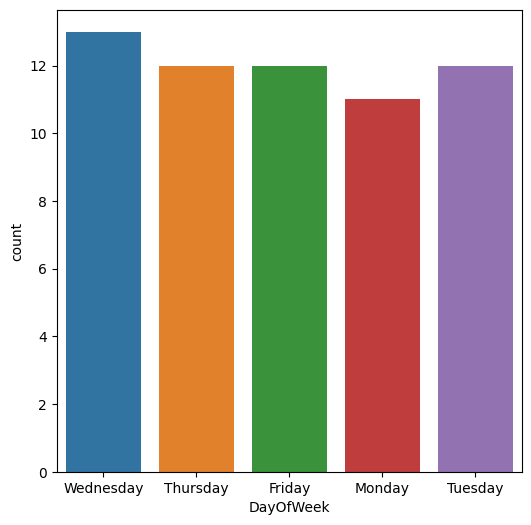



Relation between Non-urgent order and Target order


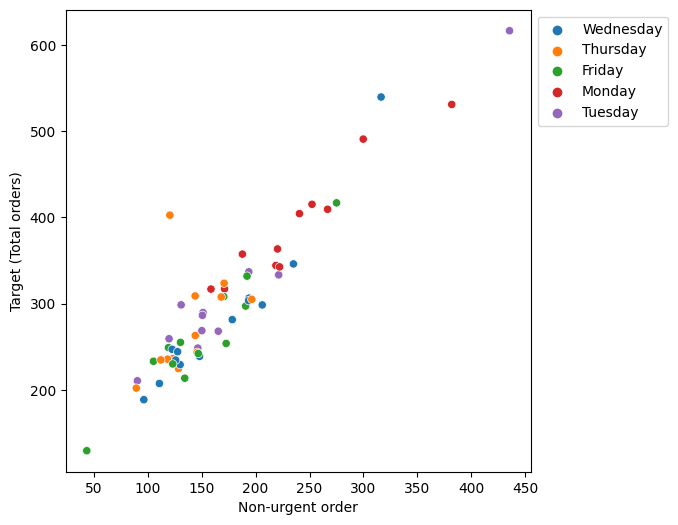



 Histograms


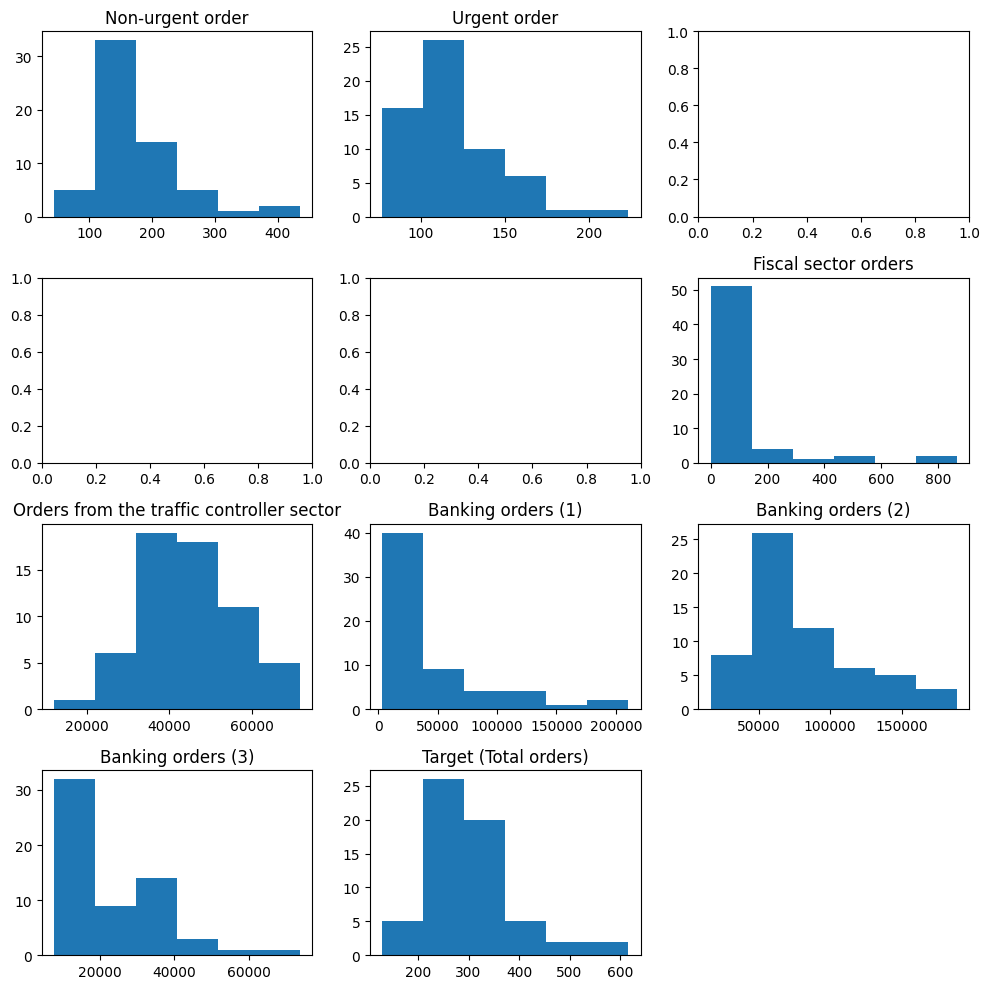



Facetgrids


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages

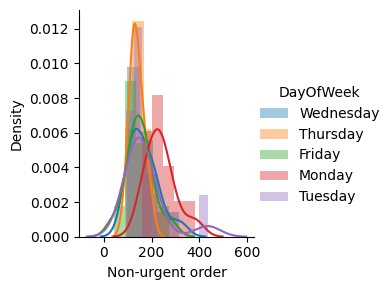

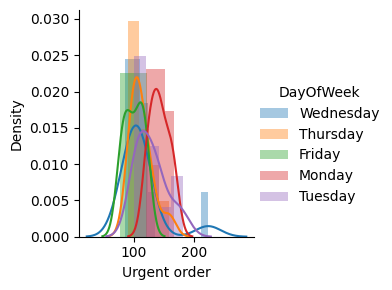

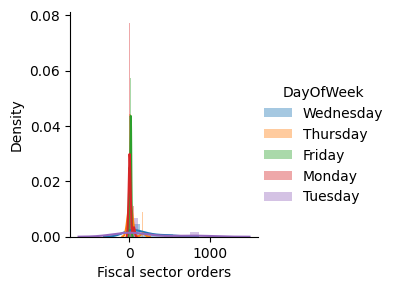

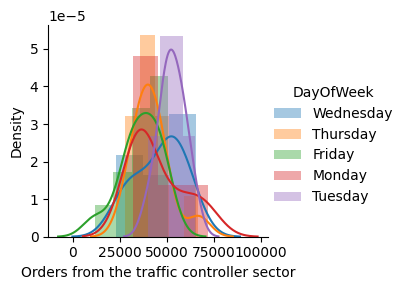

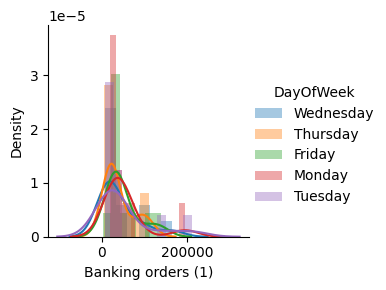

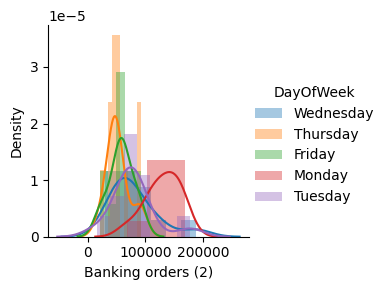

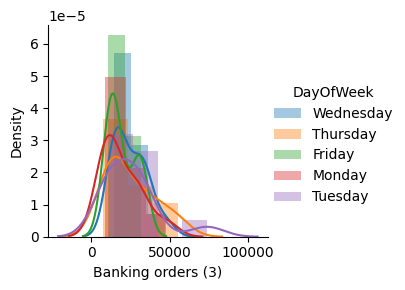

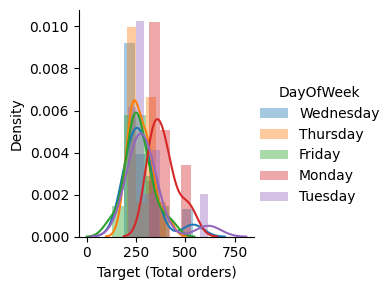

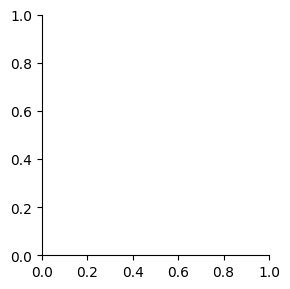



Strip plot between day of week and Target(Total orders)


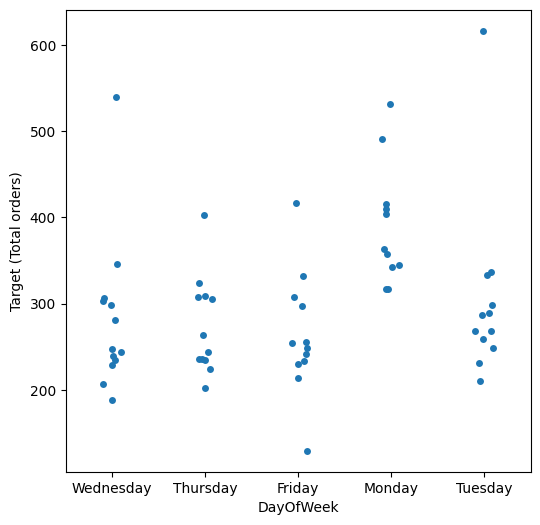



Violin plot between day of week and Target(Total orders)


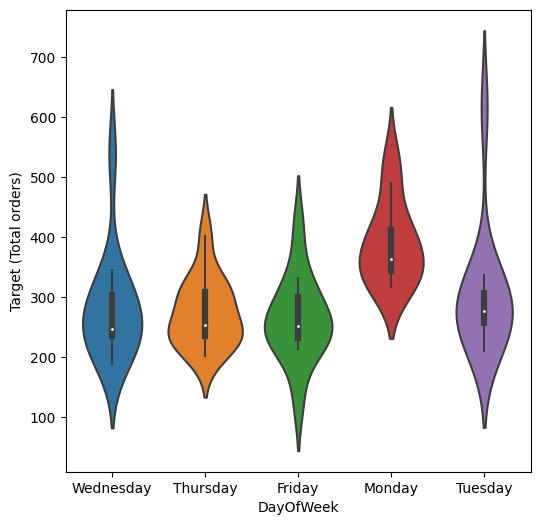

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x='DayOfWeek', data=df, )
plt.show()

#Relation between variables
print('\n\nRelation between Non-urgent order and Target order')
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Non-urgent order', y='Target (Total orders)',hue='DayOfWeek', data=df, )
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()


#histograms
print('\n\n Histograms')
fig, axes = plt.subplots(4, 3, figsize=(10,10))
fig.subplots_adjust(hspace=0.5)
axes[0,0].set_title("Non-urgent order")
axes[0,0].hist(df['Non-urgent order'], bins=6)
axes[0,1].set_title("Urgent order")
axes[0,1].hist(df['Urgent order'], bins=6);

axes[1,2].set_title("Fiscal sector orders")
axes[1,2].hist(df['Fiscal sector orders'],bins=6);
axes[2,0].set_title("Orders from the traffic controller sector")
axes[2,0].hist(df['Orders from the traffic controller sector'], bins=6)
axes[2,1].set_title("Banking orders (1)")
axes[2,1].hist(df['Banking orders (1)'], bins=6);
axes[2,2].set_title("Banking orders (2)")
axes[2,2].hist(df['Banking orders (2)'], bins=6);
axes[3,0].set_title("Banking orders (3)")
axes[3,0].hist(df['Banking orders (3)'], bins=6);
axes[3,1].set_title("Target (Total orders)")
axes[3,1].hist(df['Target (Total orders)'], bins=6);
plt.delaxes(axes[3, 2])  # Remove the empty subplot
plt.tight_layout()
plt.show()

print('\n\nFacetgrids')
plot = sns.FacetGrid(df, hue="DayOfWeek")
plot.map(sns.distplot, "Non-urgent order").add_legend()
plot = sns.FacetGrid(df, hue="DayOfWeek")
plot.map(sns.distplot, "Urgent order").add_legend()
plot = sns.FacetGrid(df, hue="DayOfWeek")
plot.map(sns.distplot, "Fiscal sector orders").add_legend()
plot = sns.FacetGrid(df, hue="DayOfWeek")
plot.map(sns.distplot, "Orders from the traffic controller sector").add_legend()
plot = sns.FacetGrid(df, hue="DayOfWeek")
plot.map(sns.distplot, "Banking orders (1)").add_legend()
plot = sns.FacetGrid(df, hue="DayOfWeek")
plot.map(sns.distplot, "Banking orders (2)").add_legend()
plot = sns.FacetGrid(df, hue="DayOfWeek")
plot.map(sns.distplot, "Banking orders (3)").add_legend()
plot = sns.FacetGrid(df, hue="DayOfWeek")
plot.map(sns.distplot, "Target (Total orders)").add_legend()
plot = sns.FacetGrid(df, hue="DayOfWeek")
plt.show()

# Relation between day of week and Target(Total orders) using a Strip plot
print('\n\nStrip plot between day of week and Target(Total orders)')
plt.figure(figsize=(6, 6))
sns.stripplot(x = 'DayOfWeek',y ='Target (Total orders)', data = df)
plt.show()

# Relation between day of week and Target(Total orders) using a Violin plot
print('\n\nViolin plot between day of week and Target(Total orders)')
plt.figure(figsize=(6, 6))
sns.violinplot(x="DayOfWeek", y="Target (Total orders)", data=df, size=6)
plt.show()

4. Identify significant correlations

<ipython-input-9-f4fe4acbb668>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Correlation matrix:
                                                     Week of the month (first week, second, third, fourth or fifth week  \
Week of the month (first week, second, third, f...                                           1.000000                    
Non-urgent order                                                                             0.243472                    
Urgent order                                                                                 0.118258                    
Fiscal sector orders                                                                         0.000964                    
Orders from the traffic controller sector                                                   -0.194088                    
Banking orders (1)                                                                           0.392310                    
Banking orders (2)                                                                           0.147086                    
Ban

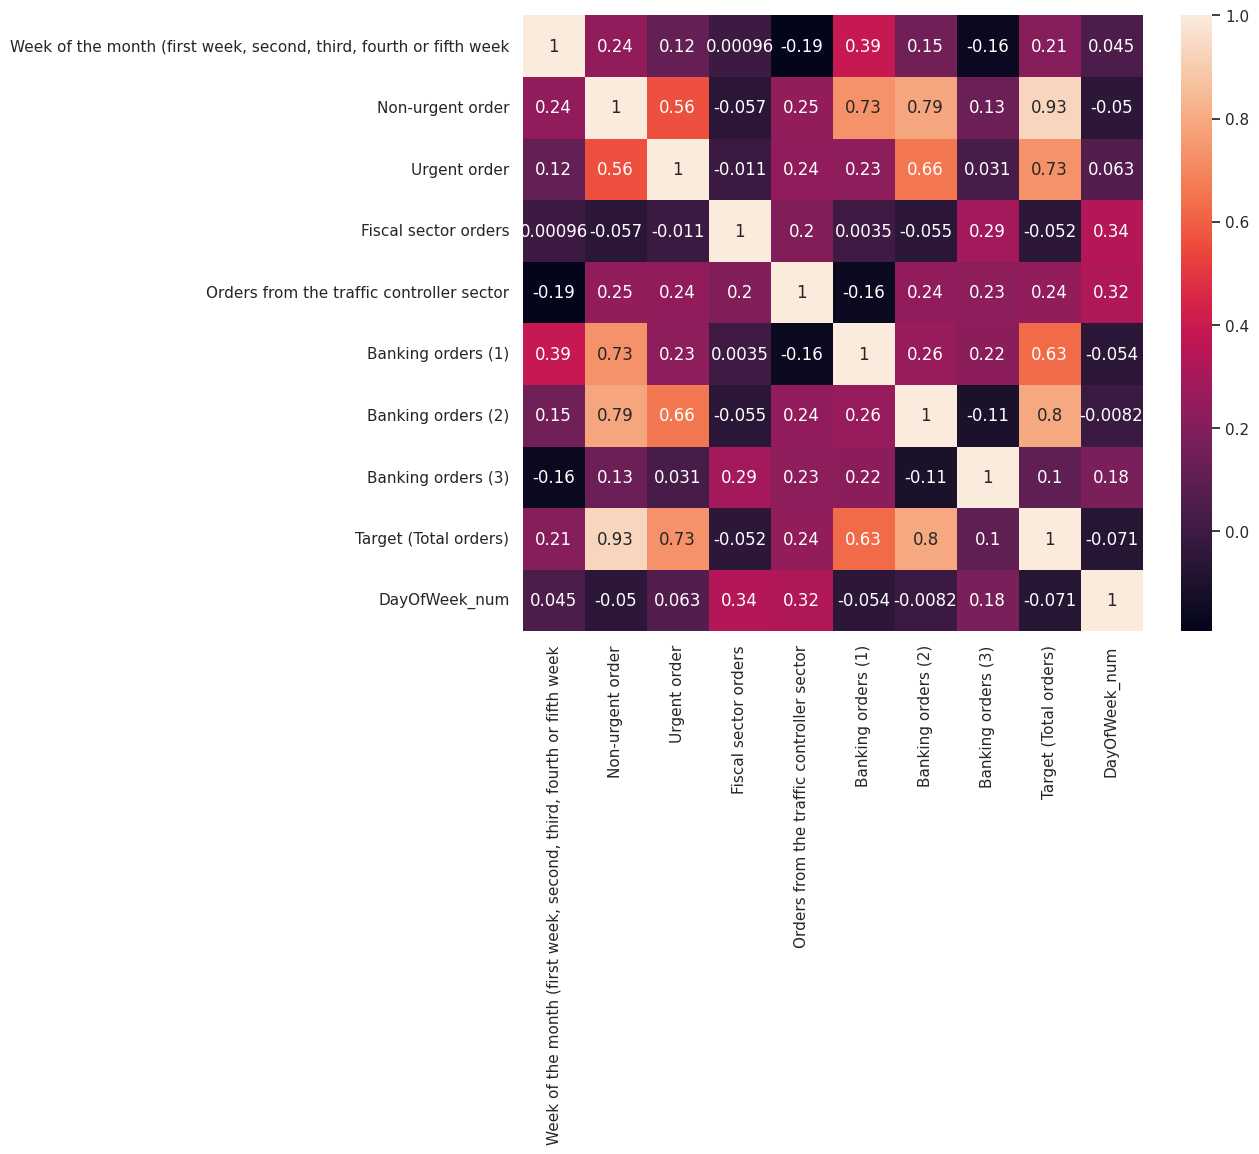

In [ ]:
# Convert DayOfWeek to categorical variable
df['DayOfWeek'] = df['DayOfWeek'].astype('category')
# Convert DayOfWeek to numerical variable
df['DayOfWeek_num'] = df['DayOfWeek'].cat.codes
# Compute correlation matrix
corr_matrix = df.corr()
# Print correlation matrix
print("Correlation matrix:\n", corr_matrix)
# Plot heatmap
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(corr_matrix, annot = True)
plt.show()

5. Spot Outliers

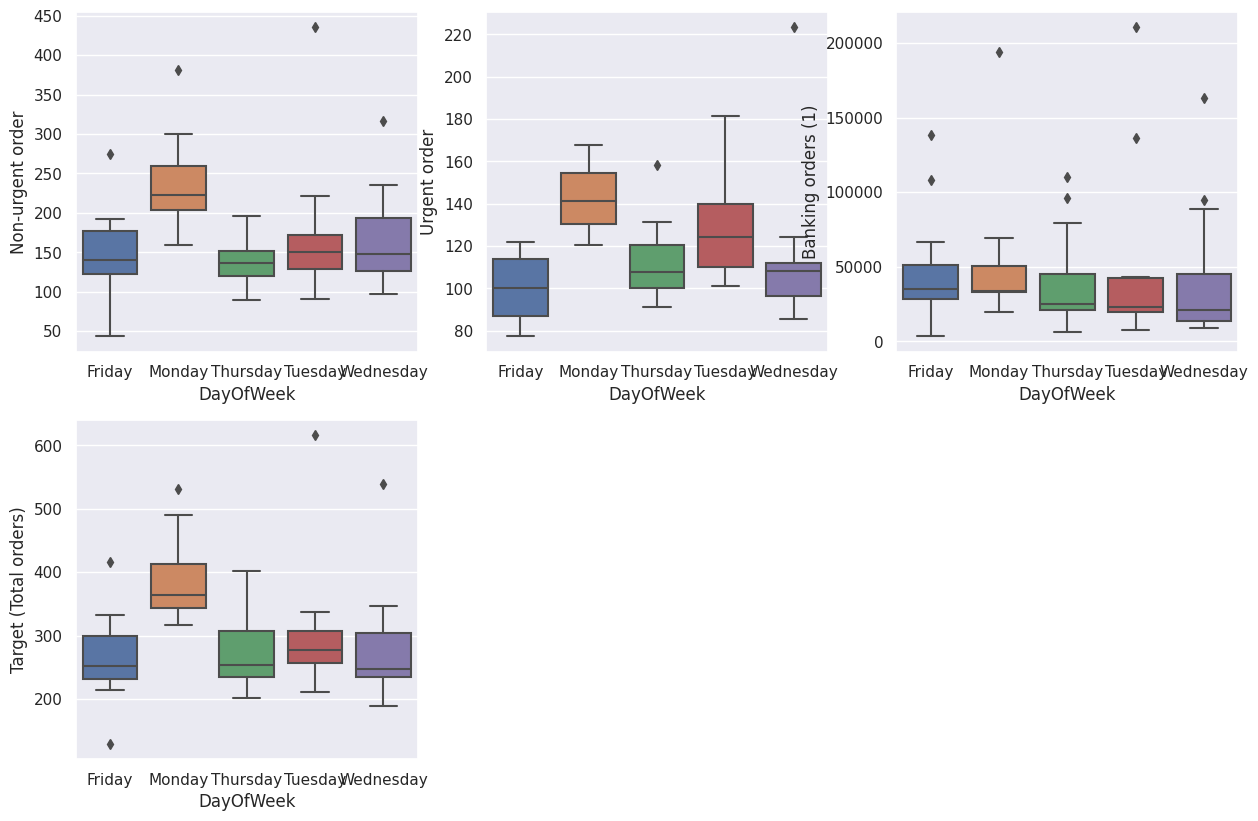

In [ ]:
# boxplots
def graph(y):
 sns.boxplot(x="DayOfWeek", y=y, data=df)
plt.figure(figsize=(15,15))
# Adding the subplot at the specified
# grid position
plt.subplot(331)
graph('Non-urgent order')
plt.subplot(332)
graph('Urgent order')
plt.subplot(333)
graph('Banking orders (1)')
plt.subplot(334)
graph('Target (Total orders)')
plt.show()


## **DESCRIPTIVE STATISTICS**

In [ ]:
#Calculating the sample mean and Sample Standard deviation
mean = df.mean()
std = df.std()
print("Mean:\n", mean)
print("\nStandard deviation:\n", std)

Mean:
 Week of the month (first week, second, third, fourth or fifth week        3.016667
Non-urgent order                                                        172.554933
Urgent order                                                            118.920850
Fiscal sector orders                                                     77.396133
Orders from the traffic controller sector                             44504.350000
Banking orders (1)                                                    46640.833333
Banking orders (2)                                                    79401.483333
Banking orders (3)                                                    23114.633333
Target (Total orders)                                                   300.873317
DayOfWeek_num                                                             2.050000
dtype: float64

Standard deviation:
 Week of the month (first week, second, third, fourth or fifth week        1.282102
Non-urgent order                           

<ipython-input-12-a36a971a4b83>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()
<ipython-input-12-a36a971a4b83>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std = df.std()


In [ ]:
#Calculating the quartiles
quartiles = df.quantile([0.25, 0.5, 0.75])
print("Quartiles:\n", quartiles)

Quartiles:
       Week of the month (first week, second, third, fourth or fifth week  \
0.25                                                2.0                    
0.50                                                3.0                    
0.75                                                4.0                    

      Non-urgent order  Urgent order  Fiscal sector orders  \
0.25          125.3480     100.88800               1.24325   
0.50          151.0625     113.11450               7.83150   
0.75          194.6065     132.10825              20.36075   

      Orders from the traffic controller sector  Banking orders (1)  \
0.25                                   34994.25            20130.00   
0.50                                   44312.00            32527.50   
0.75                                   52111.75            45118.75   

      Banking orders (2)  Banking orders (3)  Target (Total orders)  \
0.25            50680.50            12609.75              238.19550   
0.50   

<ipython-input-13-7c297ccbf704>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quartiles = df.quantile([0.25, 0.5, 0.75])


In [ ]:
#box plot

In [ ]:
# Create frequency table for all variables
for col in df.columns:
    print("Frequency table for:", col)
    print(df[col].value_counts())
    print()

Frequency table for: Week of the month (first week, second, third, fourth or fifth week
2    15
3    14
4    14
5     9
1     8
Name: Week of the month (first week, second, third, fourth or fifth week, dtype: int64

Frequency table for: DayOfWeek
Wednesday    13
Friday       12
Thursday     12
Tuesday      12
Monday       11
Name: DayOfWeek, dtype: int64

Frequency table for: Non-urgent order
316.307    1
128.633    1
435.304    1
235.106    1
168.179    1
172.783    1
381.768    1
221.438    1
193.957    1
275.076    1
252.298    1
165.472    1
126.030    1
112.246    1
123.302    1
187.810    1
119.863    1
127.805    1
120.629    1
130.465    1
222.282    1
150.257    1
96.494     1
89.526     1
134.425    1
158.716    1
150.784    1
193.534    1
196.555    1
170.868    1
206.206    1
151.341    1
193.768    1
43.651     1
171.297    1
90.532     1
110.925    1
144.124    1
119.379    1
218.856    1
146.518    1
178.433    1
145.865    1
170.566    1
220.343    1
122.736    1
299.77

# **REGRESSION ANALYSIS**

In [ ]:
day_map_rev = {'Monday': 2, 'Tuesday': 3, 'Wednesday': 4, 'Thursday': 5, 'Friday': 6}
df['DayOfWeek'] = df['DayOfWeek'].map(day_map_rev)
df = df.rename(columns={'DayOfWeek': 'Day of the week (Monday to Friday)'})

from sklearn.linear_model import LinearRegression

# Split the dataset into features and target variable
X = df.drop("Target (Total orders)", axis=1)
y = df["Target (Total orders)"]

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X, y)

# Print the model coefficients
print("Coefficients:", model.coef_)
print("Intercept: ", model.intercept_)

Coefficients: [-3.14697845e-02  2.69773974e+00  1.05125185e+00  1.04144508e+00
  9.90056162e-03 -7.13306561e-05 -6.92927280e-05 -3.78037858e-05
 -5.19600616e-05 -2.50783180e+00]
Intercept:  -0.17696088908365937


In [ ]:
import statsmodels.api as sm
# Split the dataset into features and target variable
X = df.drop("Target (Total orders)", axis=1)
y = df["Target (Total orders)"]

# Add a constant term to the feature matrix to estimate the intercept
X = sm.add_constant(X)

# Fit the linear regression model using OLS
model = sm.OLS(y, X).fit()

# Print the model summary, which includes p-values for each coefficient
print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     Target (Total orders)   R-squared:                       0.937
Model:                               OLS   Adj. R-squared:                  0.924
Method:                    Least Squares   F-statistic:                     72.90
Date:                   Tue, 25 Apr 2023   Prob (F-statistic):           6.54e-26
Time:                           21:44:22   Log-Likelihood:                -271.41
No. Observations:                     60   AIC:                             564.8
Df Residuals:                         49   BIC:                             587.9
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

Simple Linear Regression to explore the relationship between the number of non-urgent orders and the total number of orders

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


X = df[["Non-urgent order"]]
y = df["Target (Total orders)"]

# Add a constant term to the feature matrix to estimate the intercept
X = sm.add_constant(X)

# Fit the linear regression model using OLS
model = sm.OLS(y, X).fit()

# Print the model summary, which includes p-values for each coefficient
print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     Target (Total orders)   R-squared:                       0.873
Model:                               OLS   Adj. R-squared:                  0.871
Method:                    Least Squares   F-statistic:                     399.9
Date:                   Tue, 25 Apr 2023   Prob (F-statistic):           1.06e-27
Time:                           21:42:46   Log-Likelihood:                -292.37
No. Observations:                     60   AIC:                             588.7
Df Residuals:                         58   BIC:                             592.9
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     